In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Uniform distribution

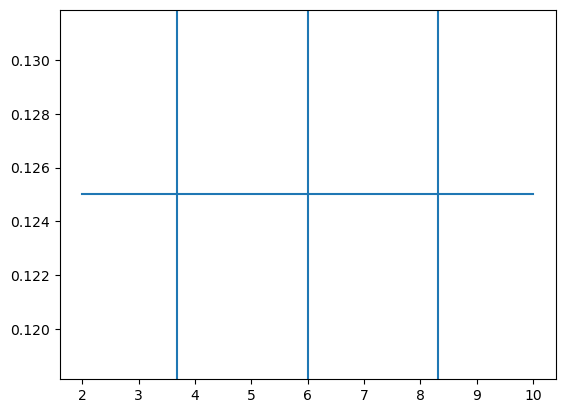

In [2]:
a = 2
b = 10
x = np.arange(a,b+1)
pdf_x = np.ones((b-a)+1)*1/(b-a)

mu = (b+a)/2
sigma = (b-a)/np.sqrt(12)

plt.plot(x, pdf_x)
plt.axvline(mu)
plt.axvline(mu - sigma)
plt.axvline(mu + sigma);
#lt.xlim(0,15);

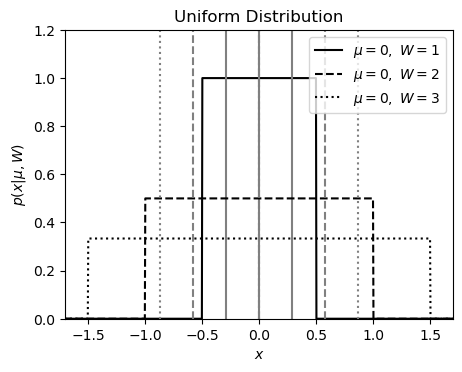

In [3]:
from scipy.stats import uniform

# Define the distribution parameters to be plotted
W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-2, 2, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))


for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W
    dist = uniform(left, W)
    sigma = W/(12)**0.5

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ W=%i$' % (mu, W))
    plt.axvline(mu, ls=ls, c='gray')
    plt.axvline(mu + sigma, ls=ls, c='gray')
    plt.axvline(mu - sigma, ls=ls, c='gray')

plt.xlim(-1.7, 1.7)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, W)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

# Gaussian

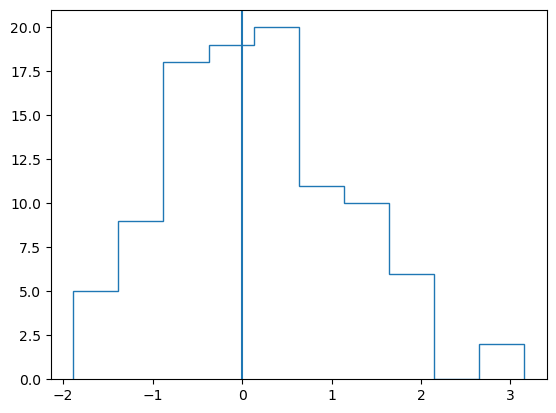

In [4]:
mu_g = 0
sigma_g = 1

x = scipy.stats.norm(mu_g,sigma_g)
x_g = x.rvs(100)

plt.hist(x_g, histtype='step')
plt.axvline(mu_g)
plt.show()

# Log-normal

1.6623322336559718


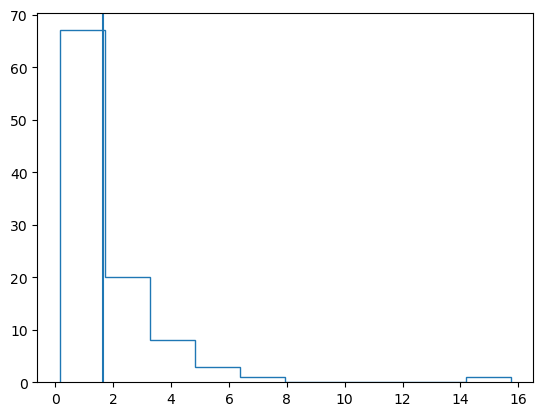

In [5]:
mu_log = 0
sigma_log = 1

x = scipy.stats.norm(mu_log,sigma_log)
y = np.exp(x.rvs(100))
mean_log = np.exp(mu_log + sigma_log**2/2)

print(y.mean())
print(x)

plt.hist(y, histtype='step')
plt.axvline(mean_log)
plt.show()

# $\chi^2$

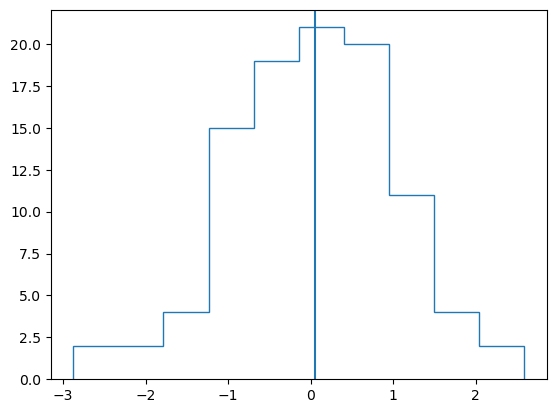

In [17]:
mu_chi = 1
sigma_chi = 2

x = scipy.stats.norm(mu_chi,sigma_chi)
x_chi = x.rvs(100)
z = (x_chi - mu_chi)/sigma_chi
mean_x = np.mean(x_chi)

plt.hist(z, histtype='step')
plt.axvline((mean_x  - mu_chi)/sigma_chi)
plt.show()

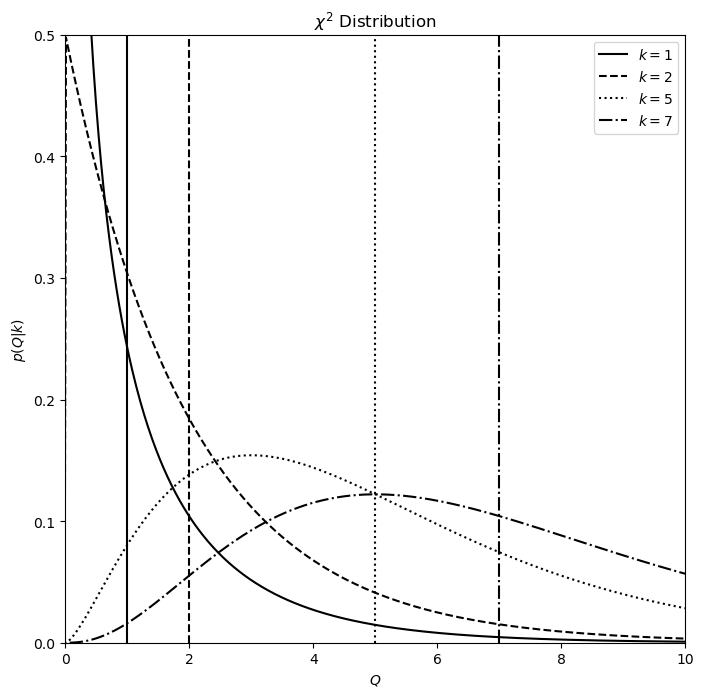

In [45]:
from scipy.stats import chi2

# Define the distribution parameters to be plotted
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',label=r'$k=%i$' % k)
    plt.axvline(k, ls=ls, c='black')

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()


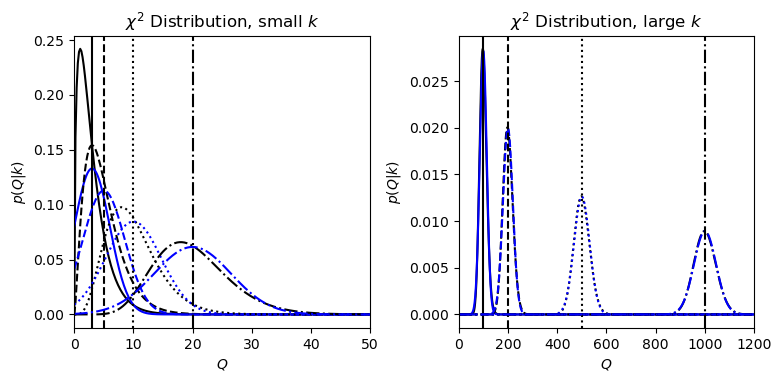

In [82]:
from scipy.stats import norm

N = 10000
x = np.linspace(0, 2000, N)
#x_chisq = np.linspace(0, 2, N)

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,bottom=0.08, top=0.92, wspace=0.3)

# plot a histogram of the distrib
ax = fig.add_subplot(221)


k_values = [3, 5, 10, 20]

for k, ls in zip(k_values, linestyles):

    dist = chi2(k, mu)

    ax.plot(x, dist.pdf(x), ls=ls, c='black',label=r'$k=%i$' % k)
    ax.plot(x, scipy.stats.norm.pdf(x, loc=k, scale=(2/(k-1))**0.5*k), ls=ls, c='blue',label=r'$k=%i$' % k)
    plt.axvline(k, ls=ls, c='black')

ax.set_xlim(0,50)
ax.set_xlabel('$Q$')
ax.set_ylabel(r'$p(Q|k)$')
ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, small $k$')

ax = fig.add_subplot(222)


k_values = [100, 200, 500, 1000]

for k, ls in zip(k_values, linestyles):

    dist = chi2(k, mu)

    ax.plot(x, dist.pdf(x), ls=ls, c='black',label=r'$k=%i$' % k)
    ax.plot(x, scipy.stats.norm.pdf(x, loc=k, scale=(2*k)**0.5), ls=ls, c='blue',label=r'$k=%i$' % k)
    ax.axvline(k, ls=ls, c='black')

ax.set_xlim(0,1200)
ax.set_xlabel('$Q$')
ax.set_ylabel(r'$p(Q|k)$')
ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, large $k$')


plt.show()